### https://www.kaggle.com/andrewmvd/fetal-health-classification

### Objective:

#### Create a multiclass model to classify CTG features into the three fetal health states.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier,NeighborhoodComponentsAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

In [3]:
df=pd.read_csv("C:/Users/dell/Downloads/fetal_health.csv")
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [35]:
df.shape

(2126, 22)

In [20]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

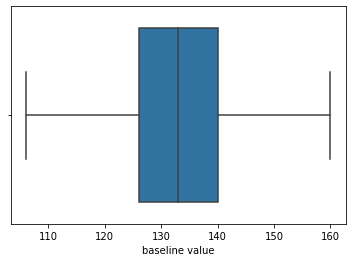

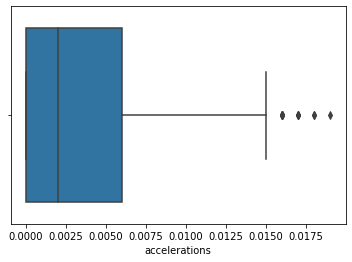

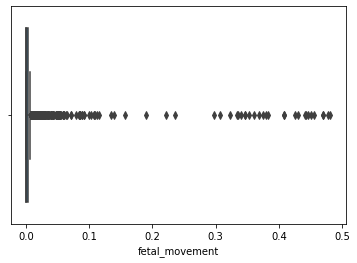

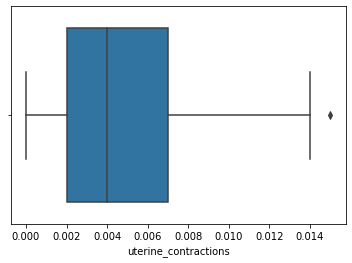

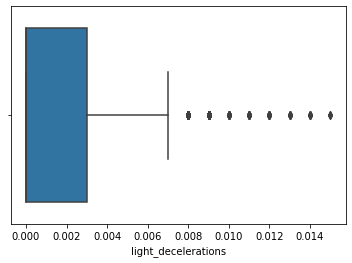

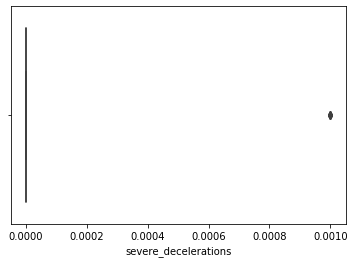

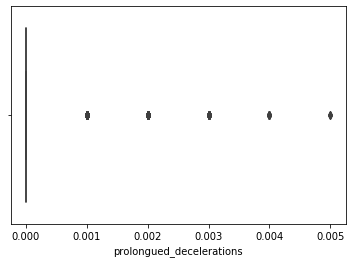

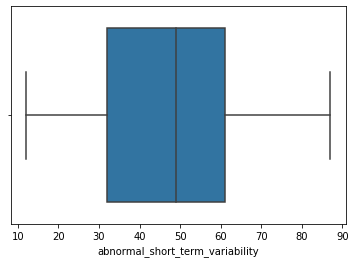

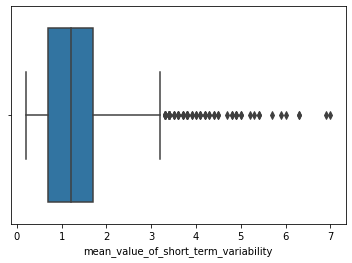

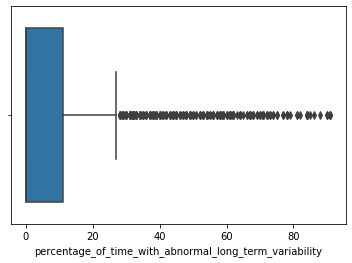

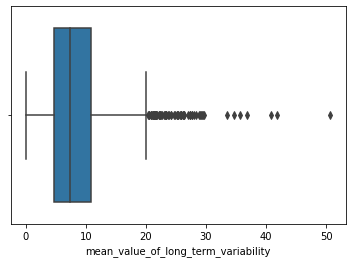

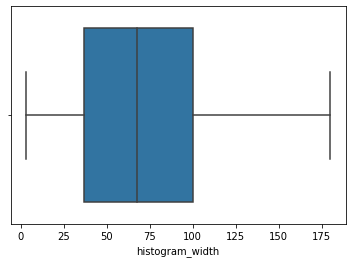

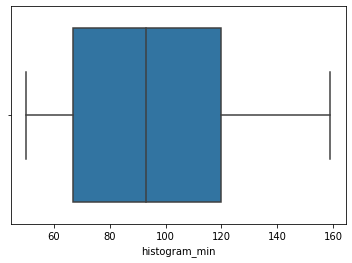

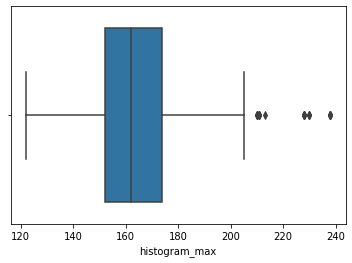

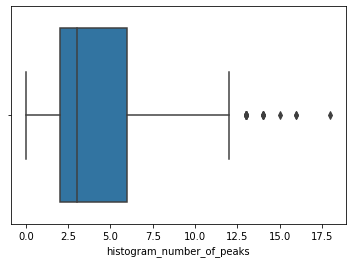

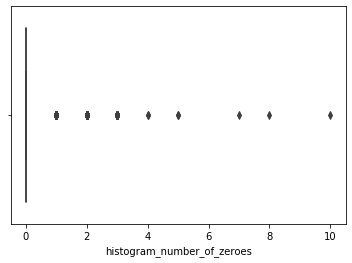

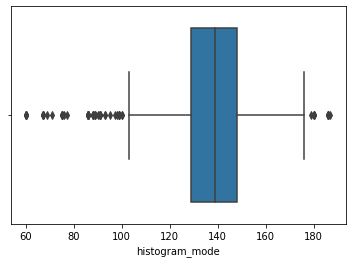

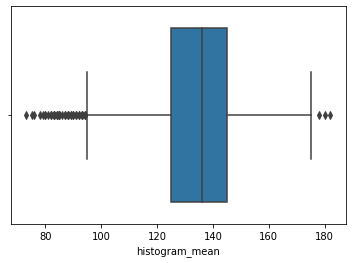

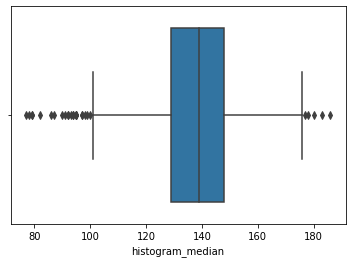

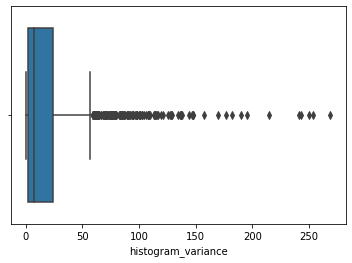

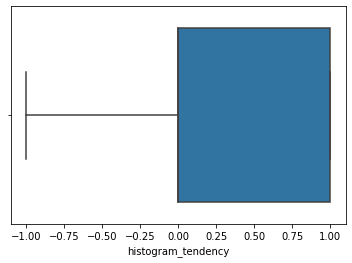

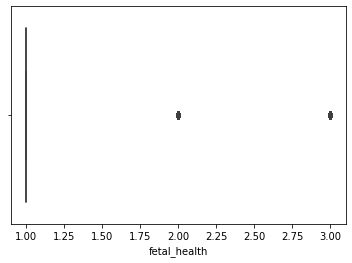

In [26]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [40]:
for i in df.columns:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    ul=q3+1.5*iqr
    ll=q1-1.5*iqr
    if any(df[i]>ul):
        print(i,"\n",df[df[i]>ul]["fetal_health"].value_counts())
        print("================================================","\n")

accelerations 
 1.0    14
Name: fetal_health, dtype: int64

fetal_movement 
 1.0    222
2.0     56
3.0     29
Name: fetal_health, dtype: int64

uterine_contractions 
 1.0    1
Name: fetal_health, dtype: int64

light_decelerations 
 1.0    109
3.0     38
2.0      3
Name: fetal_health, dtype: int64

severe_decelerations 
 3.0    6
1.0    1
Name: fetal_health, dtype: int64

prolongued_decelerations 
 3.0    94
1.0    69
2.0    15
Name: fetal_health, dtype: int64

mean_value_of_short_term_variability 
 1.0    60
3.0     7
2.0     3
Name: fetal_health, dtype: int64

percentage_of_time_with_abnormal_long_term_variability 
 2.0    146
1.0    107
3.0     56
Name: fetal_health, dtype: int64

mean_value_of_long_term_variability 
 1.0    65
2.0     5
3.0     1
Name: fetal_health, dtype: int64

histogram_max 
 1.0    18
3.0     6
Name: fetal_health, dtype: int64

histogram_number_of_peaks 
 1.0    12
3.0     4
2.0     3
Name: fetal_health, dtype: int64

histogram_number_of_zeroes 
 1.0    412
2.0 

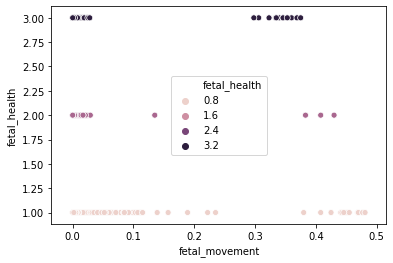

In [42]:
sns.scatterplot("fetal_movement","fetal_health",data=df,hue="fetal_health")

In [38]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

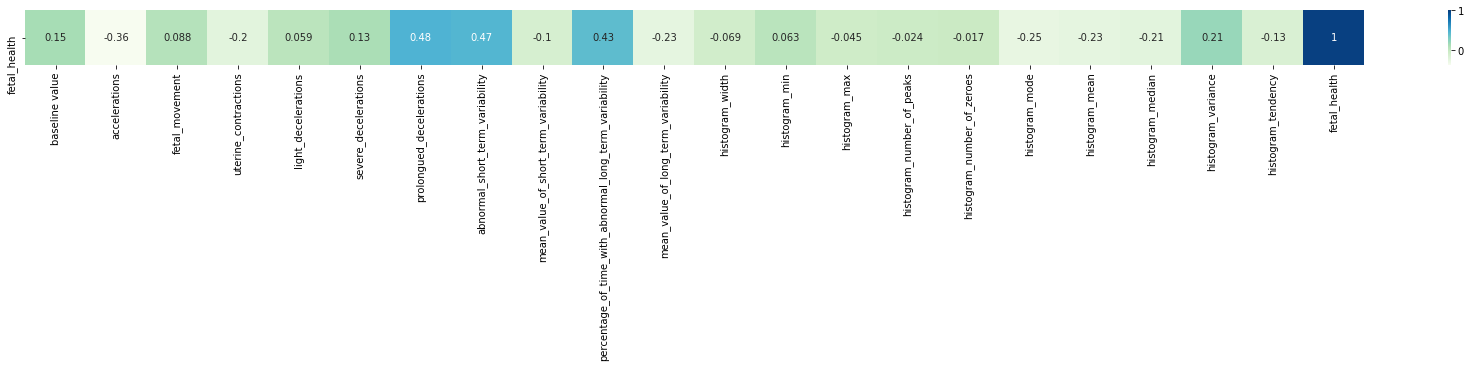

In [26]:
 plt.figure(figsize=(30,1))

sns.heatmap(df.corr().sort_values(by=["fetal_health"], ascending=False).head(1), cmap="GnBu",annot=True)

plt.show()

In [4]:
# Not scaling the values are quiet small and wouldnt be computationally intensive

x=df.drop("fetal_health",1)
y=df.fetal_health

sc=StandardScaler()

x_sc=pd.DataFrame(sc.fit_transform(x),columns=x.columns)

xtrain,xtest,ytrain,ytest=train_test_split(x_sc,y,test_size=0.3,random_state=5)


In [70]:
knn=KNeighborsClassifier()

params={"n_neighbors":range(1,150),"weights":["distance","uniform"],"p":[1,2]}

folds=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)

grid=GridSearchCV(knn,params,cv=folds,scoring="f1_weighted")

grid.fit(xtrain,ytrain)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=5, shuffle=True),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 150), 'p': [1, 2],
                         'weights': ['distance', 'uniform']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_weighted', verbose=0)

In [71]:
grid.best_params_

{'n_neighbors': 1, 'p': 1, 'weights': 'distance'}

In [24]:
knn=KNeighborsClassifier(n_neighbors=1,p=1,weights="distance")

knn_model=knn.fit(xtrain,ytrain)

print("Training accuracy of the model is : ",accuracy_score(ytrain,knn_model.predict(xtrain)),"\n")

print("Testing accuracy is : ",accuracy_score(ytest,knn_model.predict(xtest)))



Training accuracy of the model is :  1.0 

Testing accuracy is :  0.9216300940438872
